<a href="https://www.kaggle.com/code/gokulnathan45/solar-output-prediction?scriptVersionId=204538619" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Solar output energy Time Series Prediction
On the date the need of renewable energy is rising stream. The world is running towards the sustainable environment for to act against climate change. To attain sustainability there are many renewable energy sources. On the note out of 100 percent of renewable energy 40 percent mainly focused on biomass energy and on second is solar energy at 3.6 percent. While the turning tides are towards renewable energy. It has some disadvantages of its own. Some of it in the solar energy are its unpredictable nature. The solar energy changes vary on the daytime. That depends on the sun and clouds and other ambient factors. Because of this the composing of solar plants to the gird system happens to fail. Unless we have a massive storage system this will continue to exists. 

	To tackle this if we know the energy output of tomorrow, we can reroute the energy system and ready other energy sources to maintain the stability of the gird. For thus we must study the solar output of today and predict the tomorrow output. 
    
	This method of approach is called time series prediction. A steep column of solar output is given to the time series model and the model predict the tomorrow values.
    
This report details a time-series analysis project focused on energy consumption data. The primary objective was to explore trends and seasonal patterns in the data and to apply forecasting techniques using ARIMA models to predict future values. This document outlines the data preparation, visualization, modeling, and evaluation steps undertaken throughout the project.


# Import the required packages


In [1]:
#import the required packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import numpy as np


In [2]:
#test dataset
twentykwdf= pd.read_csv(r"/kaggle/input/data-of-alice-spring-project-20kw/87-Site_DKA-M9_AC-Phases.csv")
twentykwdf.tail()

,timestamp,Active_Energy_Delivered_Received,Current_Phase_Average,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
1169221,2024-10-22 22:35:00,649792.0,0.9,0.0,NaN,21.114908,14.183758,2.109430,1.602763,31.795179,0.0,3.817806,0.873064
1169222,2024-10-22 22:40:00,649792.0,0.9,0.0,NaN,20.986631,14.160995,1.817513,1.388907,31.747753,0.0,3.879294,0.846753
1169223,2024-10-22 22:45:00,649792.0,0.9,0.0,NaN,20.821512,14.310627,2.170649,1.737522,31.708178,0.0,3.956971,0.914460
1169224,2024-10-22 22:50:00,649792.0,0.9,0.0,NaN,20.523125,14.495230,1.951808,1.520700,31.934788,0.0,3.820380,0.909553
1169225,2024-10-22 22:55:00,649792.0,0.9,0.0,NaN,20.458858,14.514666,1.585884,1.110750,31.935329,0.0,3.585641,0.696224


# Visualization and understanding of dataset

In [3]:
#understanding the data
twentykwdf.describe()

,Active_Energy_Delivered_Received,Current_Phase_Average,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
count,1.151416e+06,1.151484e+06,1.151484e+06,340915.000000,1.151060e+06,1.151066e+06,1.151095e+06,1.151095e+06,1.151101e+06,1.151104e+06,1.028082e+06,1.070209e+06
mean,4.691807e+05,1.847024e+01,4.301544e+00,2.280037,2.118623e+01,3.662007e+01,2.653508e+02,5.445657e+01,9.719918e+01,3.060636e-01,2.861773e+02,5.690083e+01
std,1.148846e+05,2.404442e+01,6.003822e+00,3.368204,1.006858e+01,2.350513e+01,3.645585e+02,9.081634e+01,1.766498e+02,2.136710e+00,3.842485e+02,1.876911e+02
min,2.295290e+05,0.000000e+00,-6.153333e-02,-919.533817,-3.998795e+01,0.000000e+00,-9.856900e+02,0.000000e+00,-1.983779e+04,0.000000e+00,-1.176106e-02,-1.919657e-02
25%,3.789690e+05,1.358334e+00,0.000000e+00,1.088958,1.457844e+01,1.822757e+01,2.385322e+00,1.282398e+00,3.125692e+01,0.000000e+00,2.685989e+00,1.530616e+00
50%,4.959850e+05,1.400000e+00,0.000000e+00,2.010556,2.178826e+01,3.021484e+01,7.413973e+00,5.939730e+00,4.311420e+01,0.000000e+00,8.516494e+00,3.576717e+00
75%,5.564760e+05,3.302942e+01,8.043643e+00,3.310951,2.840753e+01,5.081213e+01,5.309597e+02,7.328418e+01,1.512054e+02,0.000000e+00,5.816172e+02,7.997149e+01
max,6.497920e+05,9.707367e+01,2.342620e+01,54.389500,6.192355e+01,1.311584e+02,2.015182e+03,8.012316e+02,3.015234e+04,6.599997e+01,1.553391e+03,9.732259e+04


In [4]:
#next up is data analysis and data cleaning
type(twentykwdf['timestamp'])

pandas.core.series.Series

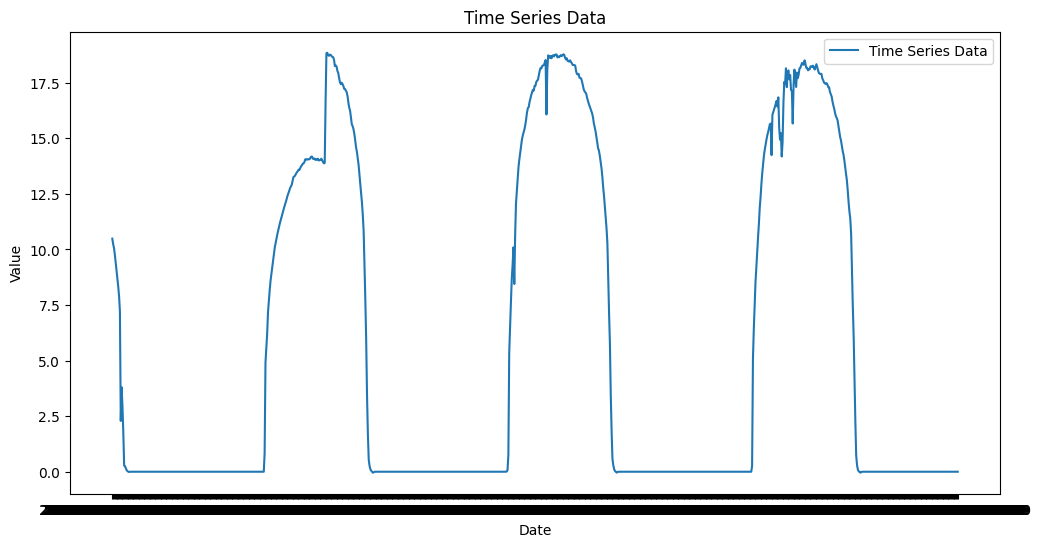

In [5]:
#visualization of data 
one_month_data=twentykwdf.head(1000)
plt.figure(figsize=(12, 6))
plt.plot(one_month_data['timestamp'], one_month_data['Active_Power'], label='Time Series Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.legend()
plt.show()
# the following graph shows the active power output for three days

In [6]:
twentykwdf.index

RangeIndex(start=0, stop=1169226, step=1)

In [7]:
#change the index as timestamp to resample the data for 1 hour
twentykwdf['timestamp'] = pd.to_datetime(twentykwdf['timestamp'])

# Set the 'Date' column as the index
twentykwdf.set_index('timestamp', inplace=True)

# Now, your DataFrame's index is a timestamp
twentykwdf.index

DatetimeIndex(['2013-07-25 16:35:00', '2013-07-25 16:40:00',
               '2013-07-25 16:45:00', '2013-07-25 16:50:00',
               '2013-07-25 16:55:00', '2013-07-25 17:00:00',
               '2013-07-25 17:05:00', '2013-07-25 17:10:00',
               '2013-07-25 17:15:00', '2013-07-25 17:20:00',
               ...
               '2024-10-22 22:10:00', '2024-10-22 22:15:00',
               '2024-10-22 22:20:00', '2024-10-22 22:25:00',
               '2024-10-22 22:30:00', '2024-10-22 22:35:00',
               '2024-10-22 22:40:00', '2024-10-22 22:45:00',
               '2024-10-22 22:50:00', '2024-10-22 22:55:00'],
              dtype='datetime64[ns]', name='timestamp', length=1169226, freq=None)

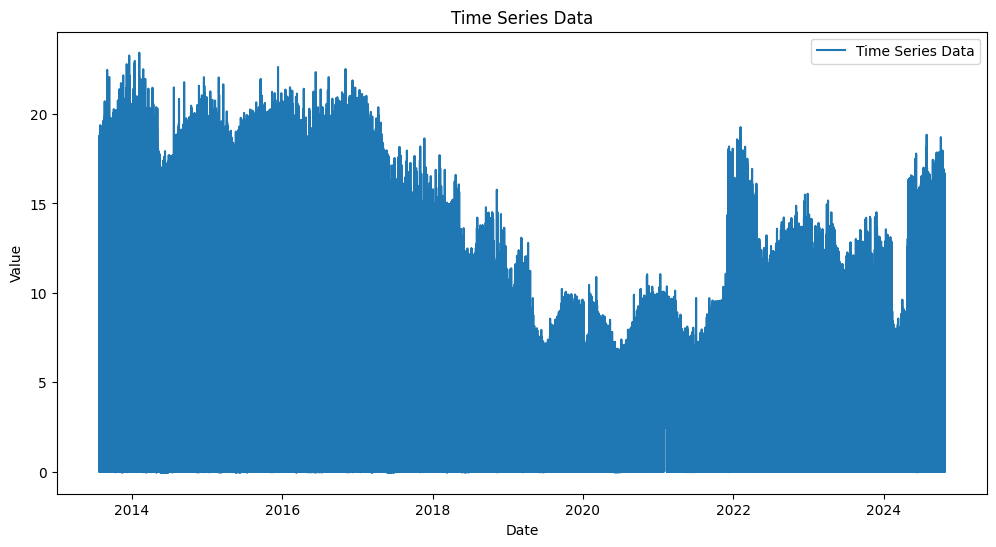

In [8]:
# resampling the data for 1 hour
hourly_data=twentykwdf.Active_Power.resample('h').first()
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index, hourly_data, label='Time Series Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.legend()
plt.show()


In [9]:
#Using the 10 years of data for training will make the model more unfit for future prediction
#so we are striping the data for 4 year
#Striping last four years of data for the experiment

last_4years=hourly_data.loc['2020-01-01 00:00:00':]
print(last_4years.tail(),last_4years.head())

timestamp
2024-10-22 18:00:00    1.469167
2024-10-22 19:00:00    0.000000
2024-10-22 20:00:00    0.000000
2024-10-22 21:00:00    0.000000
2024-10-22 22:00:00    0.000000
Freq: h, Name: Active_Power, dtype: float64 timestamp
2020-01-01 00:00:00    0.0
2020-01-01 01:00:00    0.0
2020-01-01 02:00:00    0.0
2020-01-01 03:00:00    0.0
2020-01-01 04:00:00    0.0
Freq: h, Name: Active_Power, dtype: float64


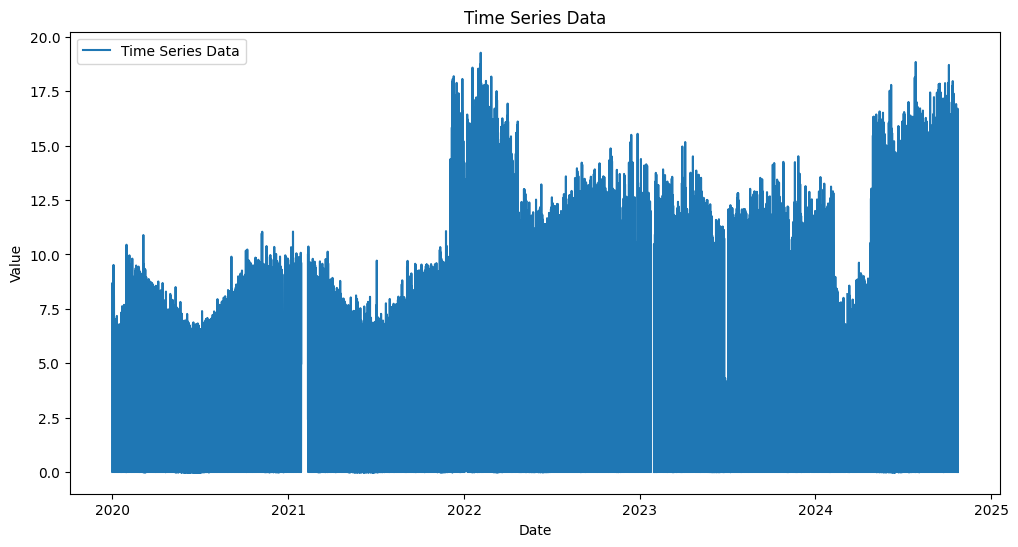

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(last_4years.index, last_4years, label='Time Series Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.legend()
plt.show()


In [11]:
#removing the nullvalues from the data set
last_4years.dropna()

timestamp
2020-01-01 00:00:00    0.000000
2020-01-01 01:00:00    0.000000
2020-01-01 02:00:00    0.000000
2020-01-01 03:00:00    0.000000
2020-01-01 04:00:00    0.000000
                         ...   
2024-10-22 18:00:00    1.469167
2024-10-22 19:00:00    0.000000
2024-10-22 20:00:00    0.000000
2024-10-22 21:00:00    0.000000
2024-10-22 22:00:00    0.000000
Name: Active_Power, Length: 41229, dtype: float64

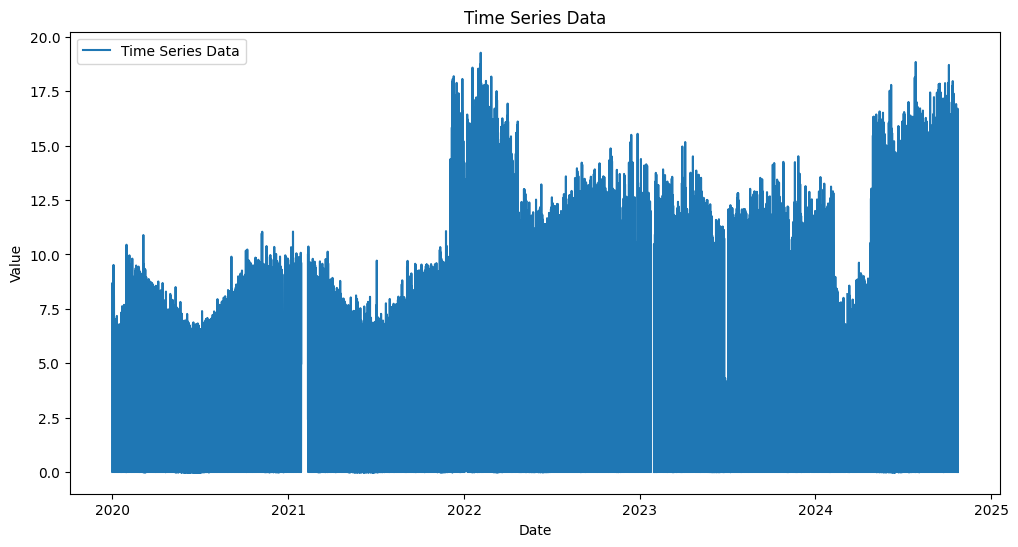

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(last_4years.index, last_4years, label='Time Series Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.legend()
plt.show()


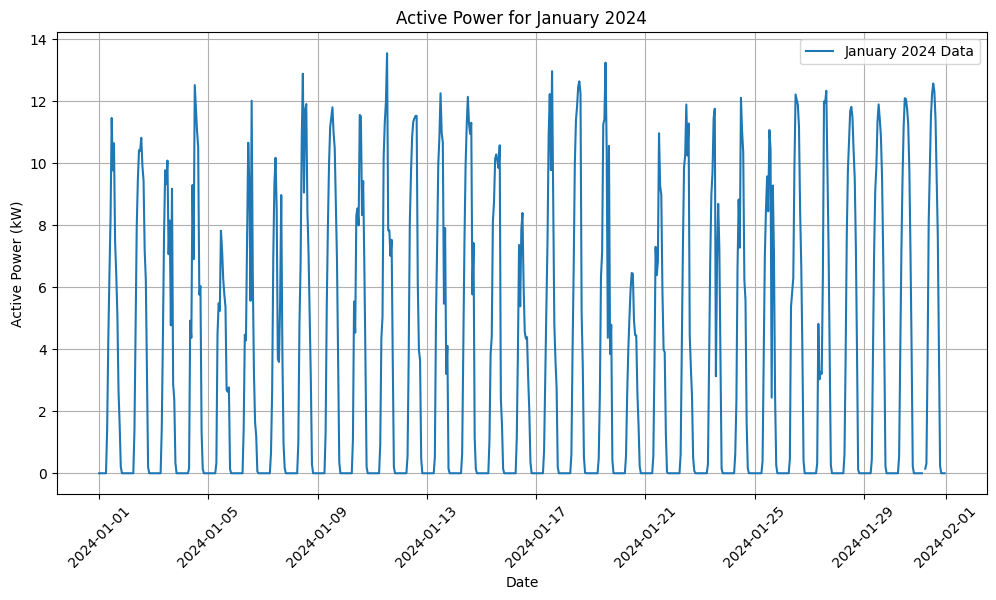

In [13]:
#to understand the data more clearly we have to look close
#For that ploting one month data in graph
one_month_data = hourly_data.loc['2024-01']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(one_month_data.index, one_month_data, label='January 2024 Data', linestyle='-')
plt.title('Active Power for January 2024')
plt.xlabel('Date')
plt.ylabel('Active Power (kW)') 
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)  
plt.show()

This graph will help us to understand the seasonality and trend of the dataset

<Figure size 1200x600 with 0 Axes>

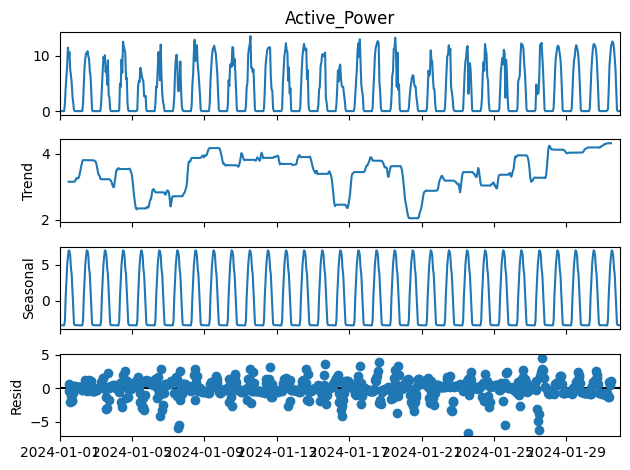

In [14]:
#even though we droped the null values the might be missing values 
#so we are filling the empty data with FFILL()
#to fill the empty data
one_month_data_filled = one_month_data.ffill()

# Decompose the time series (model='additive' or 'multiplicative')
result = seasonal_decompose(one_month_data_filled, model='additive')
plt.figure(figsize=(12, 6))
result.plot()
plt.show()


Plots for last four years

<Figure size 1200x600 with 0 Axes>

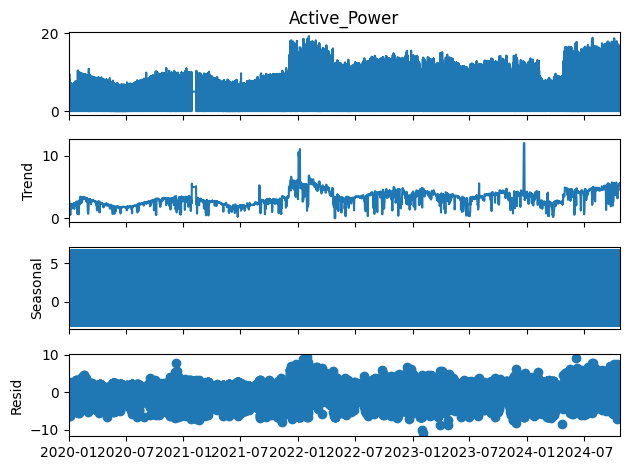

In [15]:

#to fill the empty data
last_4yearsfilled = last_4years.ffill()

# Decompose the time series (model='additive' or 'multiplicative')
result = seasonal_decompose(last_4yearsfilled, model='additive')
plt.figure(figsize=(12, 6))
result.plot()
plt.show()


on the above seasonal data is compressed as the result of daily ups and down of the data

Splitting the data set for training and testing

# Train test splitting

Training set length: 33733
Testing set length: 8434


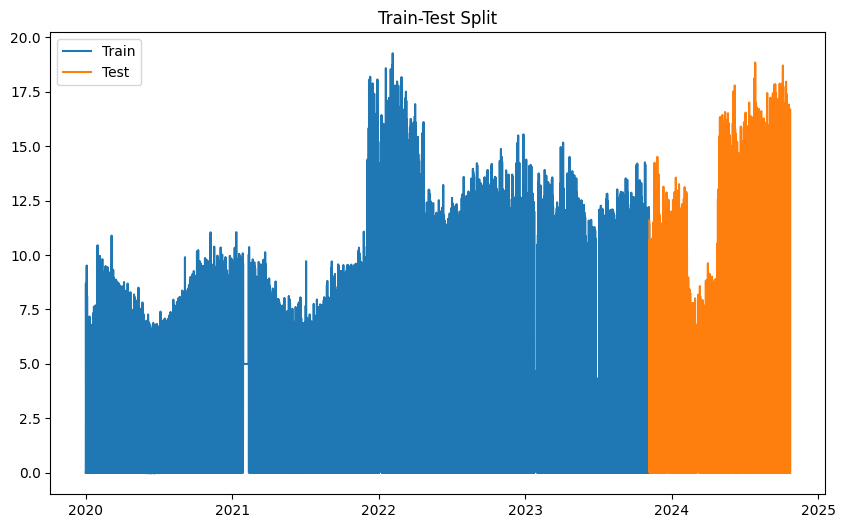

In [16]:
#train test split
train_size = int(len(last_4yearsfilled) * 0.8)  # Use 80% of the data for training
train, test = last_4yearsfilled[:train_size], last_4yearsfilled[train_size:]

print(f'Training set length: {len(train)}')
print(f'Testing set length: {len(test)}')

# Visualize train and test
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Train-Test Split')
plt.legend()
plt.show()


# Time series prediction

ARIMA model is the generalized form of time series prediction model 

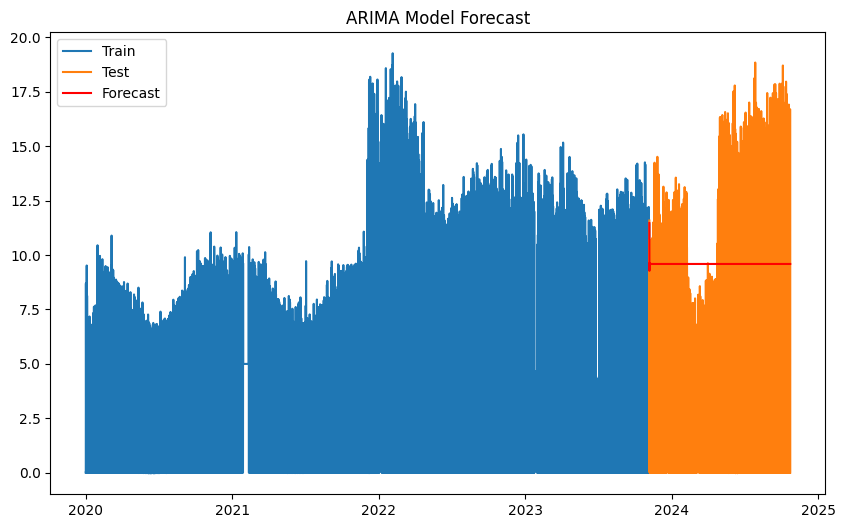

In [17]:
# Fit ARIMA model
model = ARIMA(train, order=(5,1,0))  # ARIMA(p,d,q) model
model_fit = model.fit()

# Forecast the next values (same length as test set)
forecast = model_fit.forecast(steps=len(test))

# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


In [18]:
#evaluation of model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate MSE
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")

# Optionally, calculate RMSE for better interpretability
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2=r2_score(test,forecast)
print(f"R2 Square value is ",r2)


Mean Squared Error: 61.07229149572482
Root Mean Squared Error: 7.814876294332804
R2 Square value is  -1.329930017196025


We have observerd that the model poorly perfoms And we have to imporve the models and parameters for it

In [19]:
last_4yearsfilled


timestamp
2020-01-01 00:00:00    0.000000
2020-01-01 01:00:00    0.000000
2020-01-01 02:00:00    0.000000
2020-01-01 03:00:00    0.000000
2020-01-01 04:00:00    0.000000
                         ...   
2024-10-22 18:00:00    1.469167
2024-10-22 19:00:00    0.000000
2024-10-22 20:00:00    0.000000
2024-10-22 21:00:00    0.000000
2024-10-22 22:00:00    0.000000
Freq: h, Name: Active_Power, Length: 42167, dtype: float64

We take the last one year to obtain the latest prediction varibles and features

In [20]:
one_yeardata=last_4yearsfilled.loc['2023-10-22':]

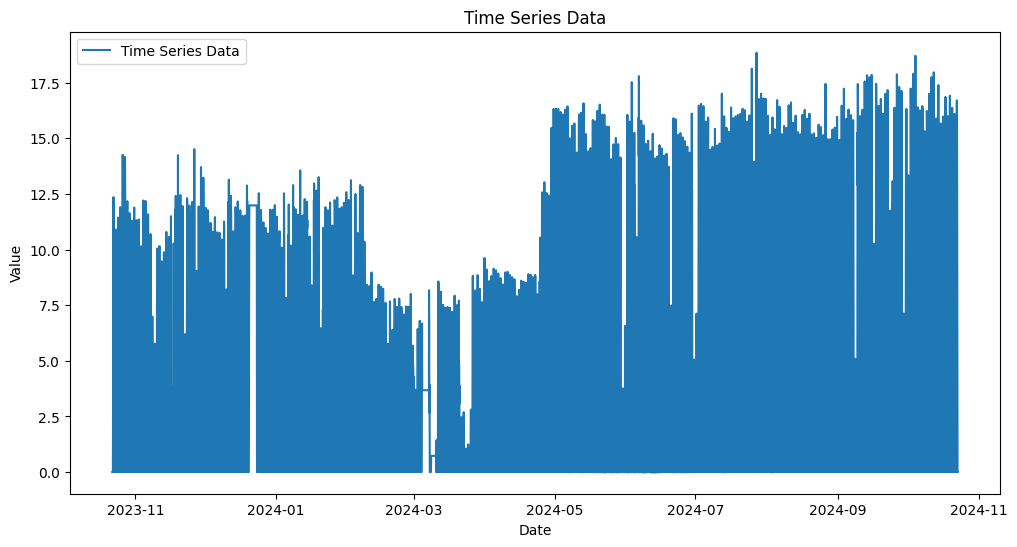

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(one_yeardata.index, one_yeardata, label='Time Series Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.legend()
plt.show()


Training set length: 7045
Testing set length: 1762


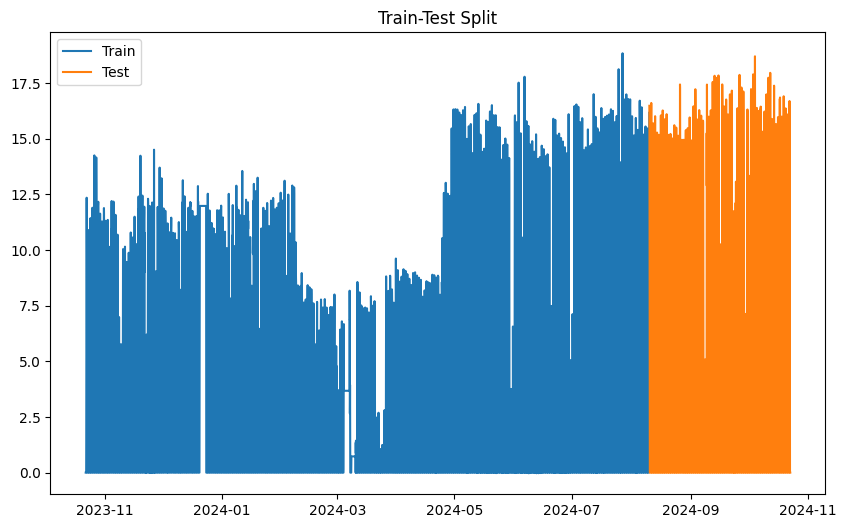

In [22]:
#train test split
train_size = int(len(one_yeardata) * 0.8)  # Use 80% of the data for training
train, test = one_yeardata[:train_size], one_yeardata[train_size:]

print(f'Training set length: {len(train)}')
print(f'Testing set length: {len(test)}')

# Visualize train and test
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Train-Test Split')
plt.legend()
plt.show()


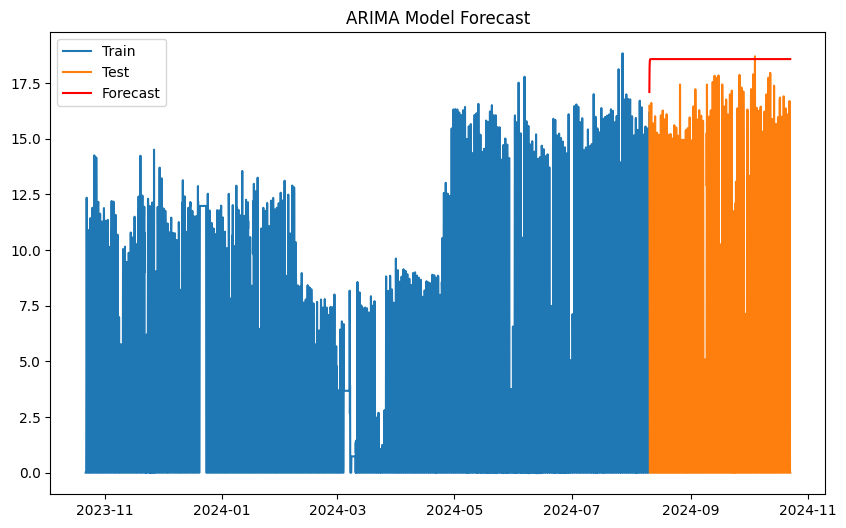

In [23]:
# Fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))  # ARIMA(p,d,q) model
model_fit = model.fit()

# Forecast the next values (same length as test set)
forecast = model_fit.forecast(steps=len(test))

# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


To see the result closely plotting the first 5 days of model prediction

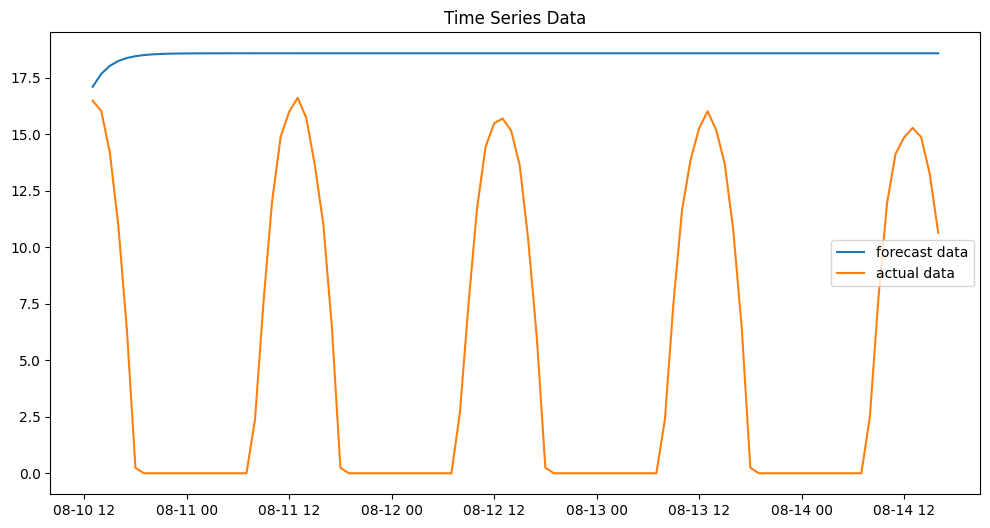

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(forecast[:100], label='forecast data')
plt.plot(test[:100],label="actual data")
plt.title('Time Series Data')

plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.legend()
plt.show()


The above graphs shows the poor performance of the model by showing that the forecast data and actual data are completely not related

Now we have to optimize the pdq parameters for better result for the model 
# Finding the best paramerter for Arima model

Best ARIMA model order: (2, 0, 2)
Best AIC score: 27052.050476662123


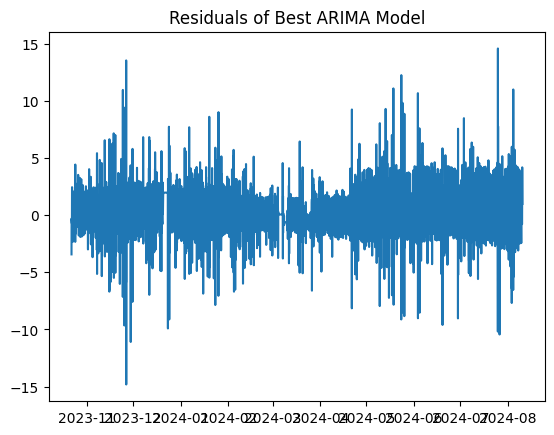

In [25]:
#finding the best p d q values for the arima models
import itertools
import warnings
warnings.filterwarnings("ignore")

# Define range of p, d, q values
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Use AIC as a metric for optimization
best_aic, best_pdq, best_model = float("inf"), None, None

for param in pdq:
    try:
        temp_model = ARIMA(train, order=param)
        temp_model_fit = temp_model.fit()
        if temp_model_fit.aic < best_aic:
            best_aic, best_pdq, best_model = temp_model_fit.aic, param, temp_model_fit
    except:
        continue

print("Best ARIMA model order:", best_pdq)
print("Best AIC score:", best_aic)

residuals = best_model.resid
plt.plot(residuals)
plt.title('Residuals of Best ARIMA Model')
plt.show()


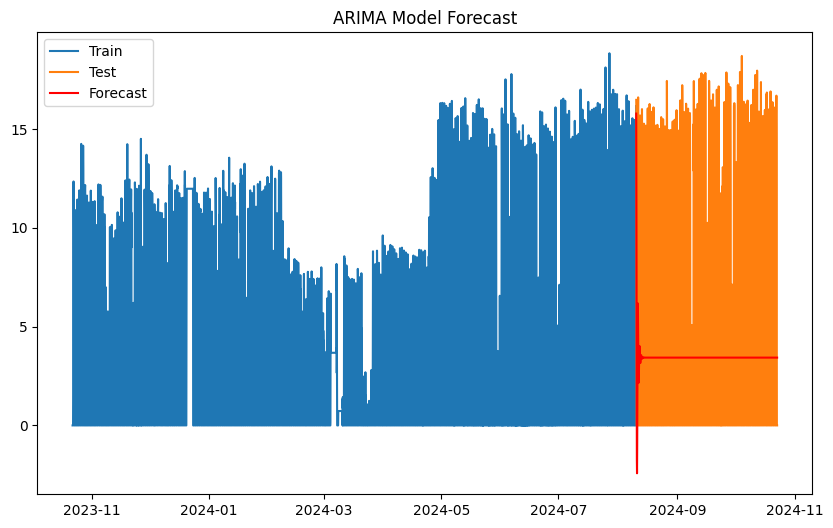

In [26]:
# Fit ARIMA model
model = ARIMA(train, order=(2, 0, 2))  # ARIMA(p,d,q) model
model_fit = model.fit()

# Forecast the next values (same length as test set)
forecast = model_fit.forecast(steps=len(test))

# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


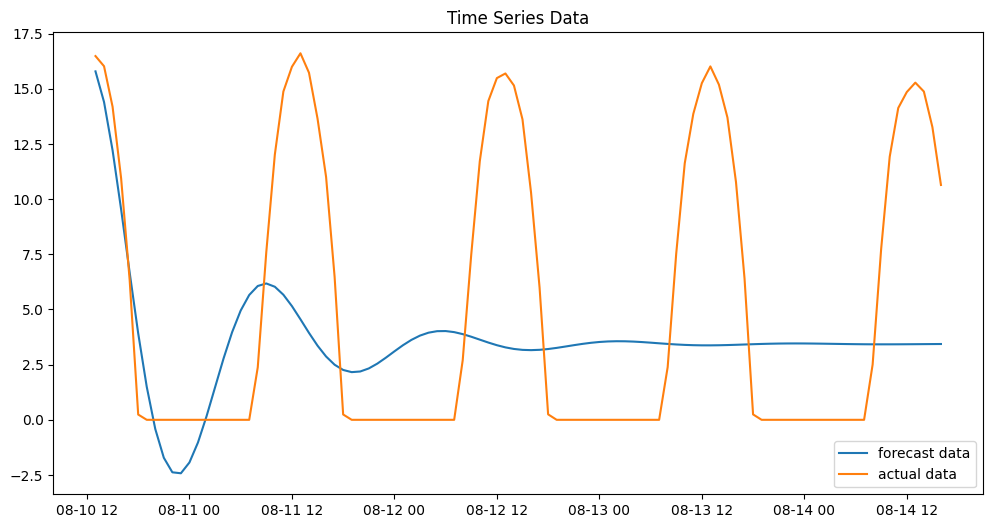

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(forecast[:100], label='forecast data')
plt.plot(test[:100],label="actual data")
plt.title('Time Series Data')

plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.legend()
plt.show()


The model imporved but it did not catch the seasonality of our dataset

# Introducing SARIMA model to understand the seasonality of data

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train, order=best_pdq, seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11153D+00    |proj g|=  5.33053D-01


 This problem is unconstrained.



At iterate    5    f=  1.86266D+00    |proj g|=  2.17908D-02

At iterate   10    f=  1.86086D+00    |proj g|=  4.88016D-03

At iterate   15    f=  1.83466D+00    |proj g|=  8.56840D-02

At iterate   20    f=  1.81490D+00    |proj g|=  1.69568D-02

At iterate   25    f=  1.80747D+00    |proj g|=  4.40628D-03

At iterate   30    f=  1.78418D+00    |proj g|=  7.84928D-02

At iterate   35    f=  1.74355D+00    |proj g|=  8.04262D-02

At iterate   40    f=  1.73387D+00    |proj g|=  9.47443D-03

At iterate   45    f=  1.73300D+00    |proj g|=  2.62077D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     66   

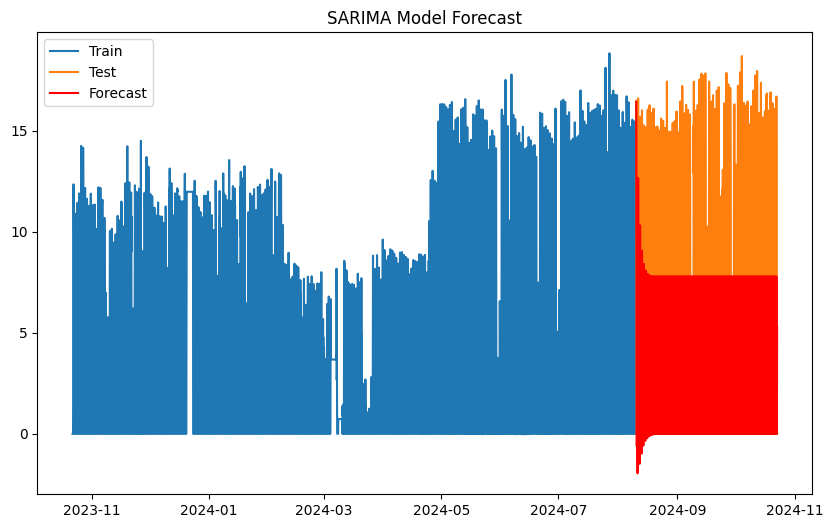

In [30]:
# Forecast the same number of steps as the test set
forecast = sarima_fit.forecast(steps=len(test))

# Plot train, test, and forecast data
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()


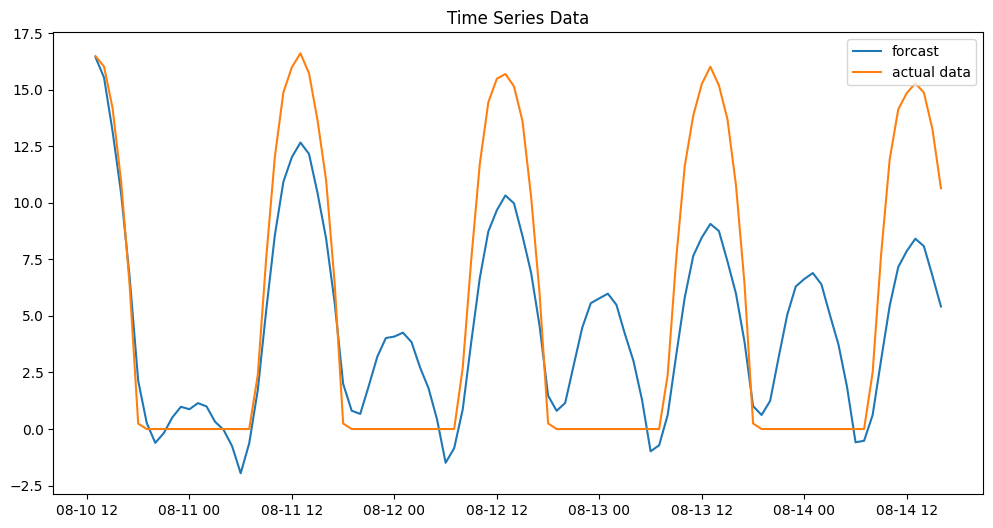

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(forecast[:100], label='forcast')
plt.plot(test[:100],label="actual data")
plt.title('Time Series Data')

plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.legend()
plt.show()

In [32]:
import numpy as np
#evaluation of model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate MSE
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")

# Optionally, calculate RMSE for better interpretability
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2=r2_score(test[:100],forecast[:100])
print(f"R2 Square value is ",r2)

Mean Squared Error: 31.228553683467876
Root Mean Squared Error: 5.588251397661694
R2 Square value is  0.6391238260873654


# Changing the parameters for SARIMAX

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10992D+00    |proj g|=  5.32971D-01


 This problem is unconstrained.



At iterate    5    f=  1.84827D+00    |proj g|=  5.05583D-02

At iterate   10    f=  1.82206D+00    |proj g|=  1.46365D-02

At iterate   15    f=  1.80905D+00    |proj g|=  6.53196D-02

At iterate   20    f=  1.77522D+00    |proj g|=  2.60429D-02

At iterate   25    f=  1.76884D+00    |proj g|=  5.51900D-03

At iterate   30    f=  1.76430D+00    |proj g|=  6.81062D-03

At iterate   35    f=  1.75861D+00    |proj g|=  2.15601D-02

At iterate   40    f=  1.75657D+00    |proj g|=  6.58040D-04

At iterate   45    f=  1.75656D+00    |proj g|=  3.68670D-04

At iterate   50    f=  1.75624D+00    |proj g|=  4.30233D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

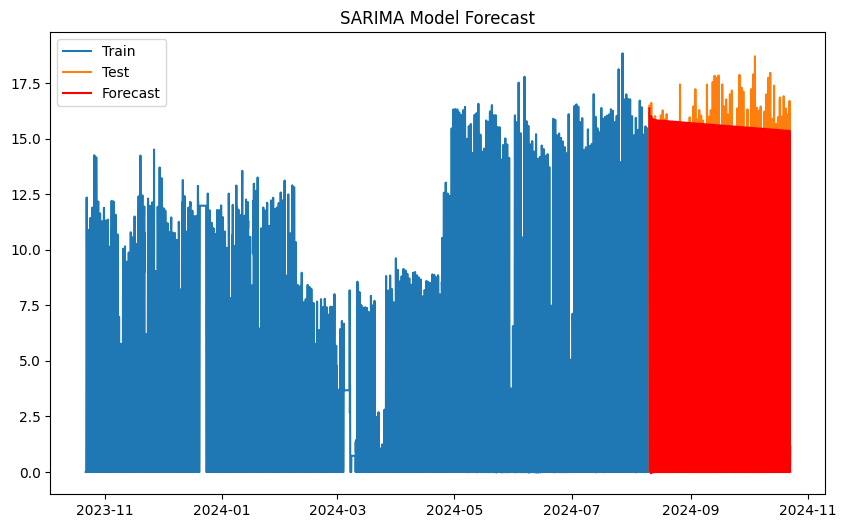

In [33]:
#SARIMA next wave 
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train, order=best_pdq, seasonal_order=(2, 1, 1, 12))
sarima_fit = sarima_model.fit()
# Forecast the same number of steps as the test set
forecast = sarima_fit.forecast(steps=len(test))

# Plot train, test, and forecast data 
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

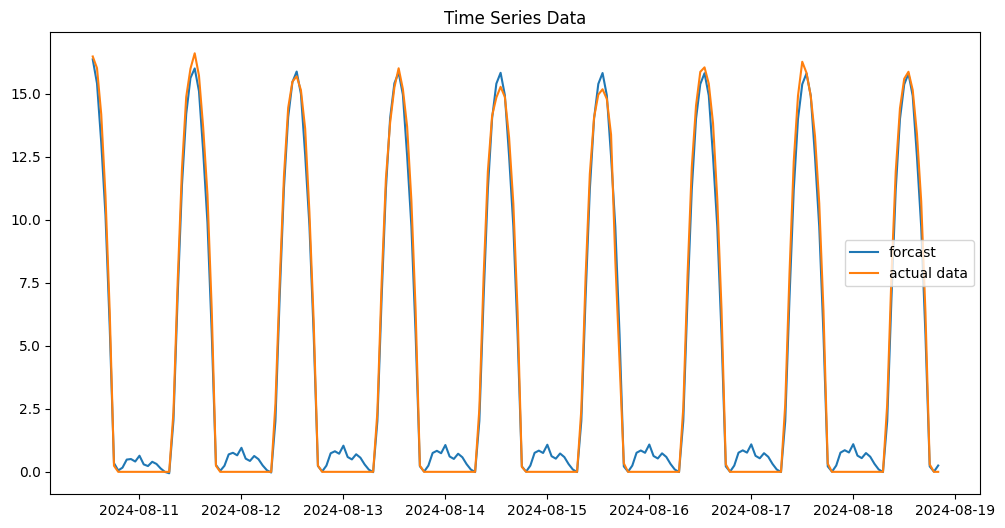

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(forecast[:200], label='forcast')
plt.plot(test[:200],label="actual data")
plt.title('Time Series Data')

plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.legend()
plt.show()

In [35]:
# Calculate MSE
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")

# Optionally, calculate RMSE for better interpretability
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2=r2_score(test,forecast)
print(f"R2 Square value is ",r2)

Mean Squared Error: 4.1020362998110205
Root Mean Squared Error: 2.0253484391114087
R2 Square value is  0.8936819872375028


# Conclusion
This project provided valuable insights into energy consumption trends and highlighted critical steps in time-series forecasting. Although the ARIMA model showed limited accuracy, it underscored the importance of model selection and tuning in time-series forecasting.But the SARIMAX model performed well and shows the r2 score of .89 that ensure the model performs is promising . Future work could involve refining model parameters, using alternative models, or incorporating additional features to improve prediction reliability.

